<heading>
    <h5>Image & Image Histogram :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <p>
    An image can be considered as a matrix with elements numbered between 0 and 255. The matrix has a dimension of (image height) x (image width) x (No. of image channels). A grayscale image has 1 channel whereas a colored image has 3 channels (for RGB).So basically each value mentioned for element is a uint8 (i.e. integer between 0 — ($2^8-1$). These values correspond to the shade of that particular parameter. 0 for minimum and 255 for maximum.<br>
    </p>
    <p>
    Now Image Histogram is basically a histogram represention of the intensity distribution of the image-pixels, which essentially quantifies the no. of pixels for each specific range of intensity values considered.Cumulative Histogram is basically represent the total no. of pixels that have intensity atmost the intensity of considered pixel.
    </p>
</body>

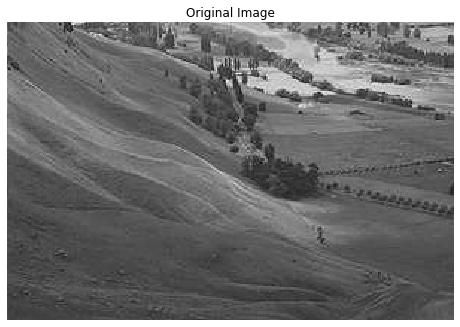

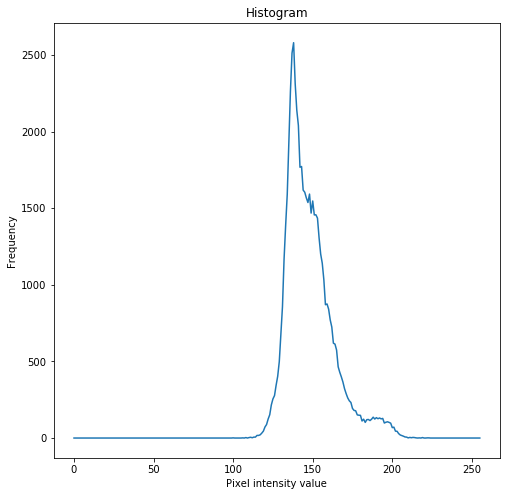

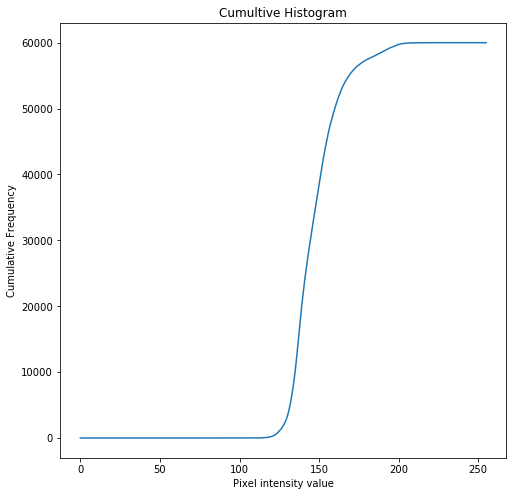

In [1]:
##  Image, Frequency & Cumulative Histogram  

# Import required modules
import cv2 as cv  # OpenCV
import numpy as np  # Numerical Python
import urllib.request as url  # URL Library
import matplotlib.pyplot as plt  # Mathematical Plot Library

# The Image address as url 
link = "https://raw.githubusercontent.com/Omegaconstant/Triphibian-Automation-App/main/Automation/8/photo.jpg"

# Extract the content of the link
url_response = url.urlopen(link)

# Convert grayscale image to a numpy array
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)

# Decode the image
img = cv.imdecode(img_array, -1)

# Plot the Original grayscale image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis( "off" )  # Switch off the axes
plt.title( "Original Image" )  # Set image title
plt.imshow( img, cmap='gray' )  # Show the grayscale image

# Calculate the image histogram
hist = cv.calcHist([img],[0], None, [256], [0,256])

# Arguments :
# [img] : input image
# [0] : index of channel
# mask : mask image. To find histogram of full image, it is given as “None”
# [256] :histSize (represent binCount)
# [0-256] : Intensity Range


# Calculate the cumulative histogram
cm_hist = []  # initailisation
cm_hist.append( hist[0] )
for i in range(1,hist.size):
    cm_hist.append( cm_hist[i-1] +hist[i] )  # append successive elements

# Plot the image histogram
plt.figure( figsize =[8,8] )  # Set figure size
plt.plot(hist)  # Plot hist
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Frequency')  # Set ylabel
plt.title('Histogram')  # Set title
plt.show()  # Show the plot

# Plot the cumulative histogram
plt.figure( figsize = [8,8] )  # Set figure size
plt.plot(cm_hist)  # Plot cm_hist
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Cumulative Frequency')  # Set ylabel
plt.title('Cumultive Histogram')  # Set title
plt.show()  # Show the plot


<heading>
    <h5>Histogram Equalisation :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <p>
    Histogram equalisation, as the name suggest basically is a transfer function, which equalises the distribution of pixel values and converts it to a  more uniform distribution. In otherwords, it generally enhances the global contrast of the image, specifically when the image-matrix is represented by a restircted range of intensity values. So it essentially adjusts the intensities by distributing those on the histogram over the complete range of intensities evenly. <br>
    </p>
</body>

<heading>
    <h5>Implementation :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    Consider a single channel discrete grayscale image {X} representaed by the 2D matrix of size r*c.
    <br>
    The no. of possible intensity values is L ( often 256) & the intensity range is 0- L-1.
    <br>
    <br>
    Let's consider that there are in total m bins (usually m=L).The range of ith bin is $ \frac{L}{m}(i-1)$ — ($\frac{Li}{m}-1$).
    Suppose $N_i$ is the no. of pixels in the range of ith bin & N is the total no. of pixels in the image-matrix.<br>
    The relative frequency of ith bin $ P_i$ in the normalised distribution is given by :
    $$ P_X(i) = \frac{N_i}{N} $$ 
    <br><br>
    Now the cumulative distribution function is given as
    <br>
    <center>
        $$ C_X(k) = \sum\limits_{i=0}^{k} P_X(i)$$ $\quad$ where $ 0\le k \le m$
     </center>
     <br>
    The histogram equalized image {Y} will be defined by
    <center>
        $ Y(i,j) = $round$( ( L-1) \times \sum\limits_{z=0\\X(i,j)\epsilon k}^{k} P_X(z) )$ $\quad$ where $ 0\le k \le m$
     </center>
     The discrete version won’t result in exactly
flat histograms, it will distribute the intensities more evenly and in doing so enhance the contrast in the image. 
    
</body>

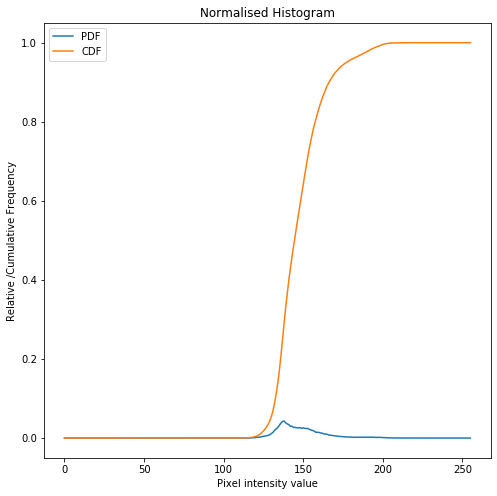

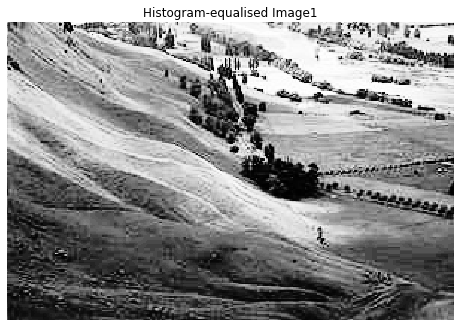

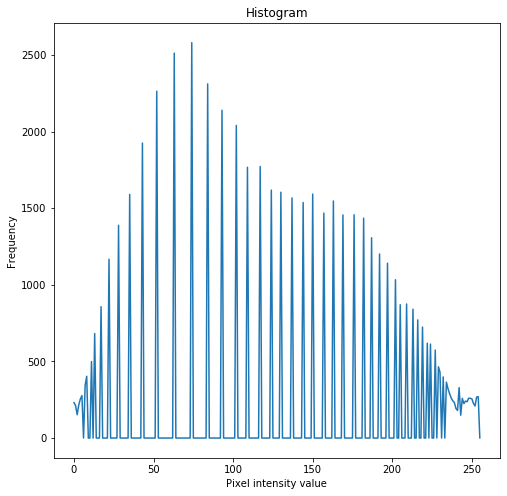

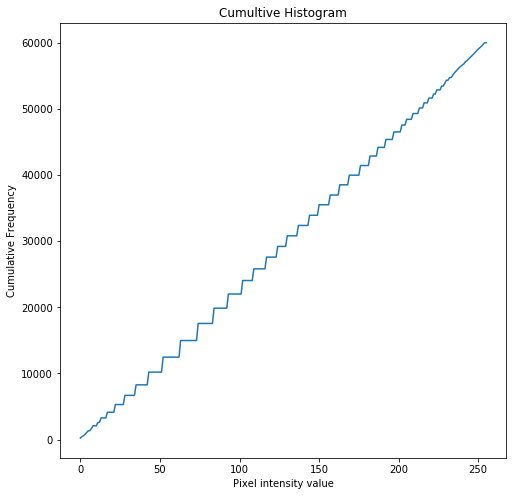

In [2]:
## Implementation from scratch by mathematical model

# Calculate the PDF
pdf=[]  # initialisation
for i in range(0,hist.size):
    pdf.append(hist[i]/cm_hist[-1])  # append succesive element
    
# Calculate the CDF
cdf=[]  # initialisation
for i in range(0,hist.size):
    cdf.append(cm_hist[i]/cm_hist[-1])  # append succesive element

# Plot PDF & CDF
plt.figure(figsize=[8,8])  # Set figure size
plt.plot(pdf)  # Plot PDF
plt.plot(cdf)  # Plot CDF
plt.legend(["PDF","CDF"])  # Set the legend label
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Relative /Cumulative Frequency')  # Set ylabel
plt.title('Normalised Histogram')  # Set title
plt.show()

# Generate the histogram equalised image
row = len(img)  # No. of rows in image-matrix
column = len(img[0])  # No., of columns in image-matrix
img_histeq1 = img  # initialise the image-matrix of singly histogram-equalised image

# Complete the histogram equalised image-matrix
for i in range(0,row):
    for j in range(0,column):
        x = img[i,j]  # pixel-intensity at ith row & jth column in image-matrix
        img_histeq1[i,j] = 255*((cdf[x]-cdf[0]))  # Set the pixel-intensity in img_histeq1
        

# Plot the singly histogram equalised image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis("off")  # Switch off the axes
plt.title("Histogram-equalised Image1")  # Set image title
plt.imshow(img,cmap='gray')  # Show the grayscale image


# Calculate the image histogram of img_histeq1
histeq1 = cv.calcHist([img_histeq1],[0], None, [256], [0,256])

# Calculate the cumulative histogram of_img_histeq1
cm_histeq1 = []  # initailisation
cm_histeq1.append(histeq1[0])
for i in range(1,histeq1.size):
    cm_histeq1.append(cm_histeq1[i-1]+histeq1[i])  # append successive elements

# Plot the image histogram of img_histeq1
plt.figure(figsize = [8,8])  # Set figure size
plt.plot(histeq1)  # Plot hist
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Frequency')  # Set ylabel
plt.title('Histogram')  # Set title
plt.show()  # Show the plot

# Plot the cumulative histogram of histeq1
plt.figure(figsize = [8,8])  # Set figure size
plt.plot(cm_histeq1)  # Plot cm_hist
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Cumulative Frequency')  # Set ylabel
plt.title('Cumultive Histogram')  # Set title
plt.show()  # Show the plot

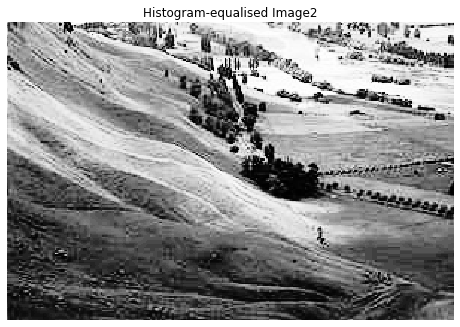

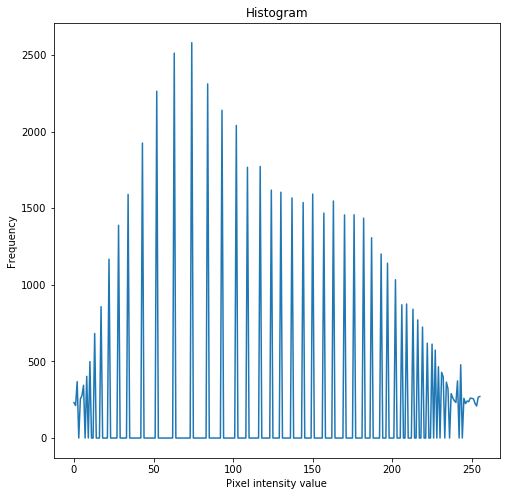

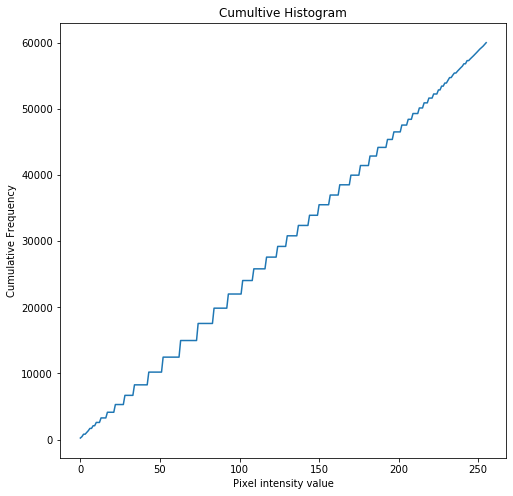

In [3]:
## Implemenattion by in-bulit function

# Generate the histogram equalised image
img_histeq2 = cv.equalizeHist(img)
# Arguments :
# img : input image array

# Plot the singly histogram equalised image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis("off")  # Switch off the axes
plt.title("Histogram-equalised Image2")  # Set image title
plt.imshow(img,cmap='gray')  # Show the grayscale image


# Calculate the image histogram of img_histeq2
histeq2 = cv.calcHist([img_histeq2],[0], None, [256], [0,256])

# Calculate the cumulative histogram of_img_histeq2
cm_histeq2 = []  # initailisation
cm_histeq2.append(histeq2[0])
for i in range(1,histeq2.size):
    cm_histeq2.append(cm_histeq2[i-1]+histeq2[i])  # append successive elements

# Plot the image histogram of img_histeq1
plt.figure(figsize = [8,8])  # Set figure size
plt.plot(histeq2)  # Plot hist
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Frequency')  # Set ylabel
plt.title('Histogram')  # Set title
plt.show()  # Show the plot

# Plot the cumulative histogram of histeq1
plt.figure(figsize = [8,8])  # Set figure size
plt.plot(cm_histeq2)  # Plot cm_hist
plt.xlabel('Pixel intensity value')  # Set xlabel
plt.ylabel('Cumulative Frequency')  # Set ylabel
plt.title('Cumultive Histogram')  # Set title
plt.show()  # Show the plot

<heading>
    <h5>Documentary References :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <ol>
        <li><a href="https://en.wikipedia.org/wiki/Histogram_equalization">Histogram-Equalisation_Wikipedia</a></li>
        <li><a href="http://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf">Histogram-Equalisation_Mathematics</a></li>
        <li><a href="https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html">Histogram-Calculation_OpenCV</a></li>
        <li><a href="https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html">Histogram-Equalisation_OpenCV</a></li>
</body>